In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

import sys


sys.path.append('../viz')
sys.path.append('../')
sys.path.append('../..')

import optimneuralts
import viz_config
from utils import *


saves_path = '../saves'
%load_ext autoreload
%autoreload 2

In [9]:
# Cible a predire / prediction effectue x,y plot
exp = "50_rx_100000_combis_4_patterns_3_bs512_warmup10000_nmembers512_valnoval_ldsTrue_trainevery10_patience25_usedecay_lrplateau_nonoise"
dataset = "50_rx_100000_combis_4_patterns_3"
seed = 0
combis, risks, pat_vecs, n_obs, n_dim = load_dataset(dataset, path_to_dataset="../datasets")

max_risk = risks.max().cpu().numpy()

model = torch.load(f"{saves_path}/{exp}/agents/{seed}.pth")

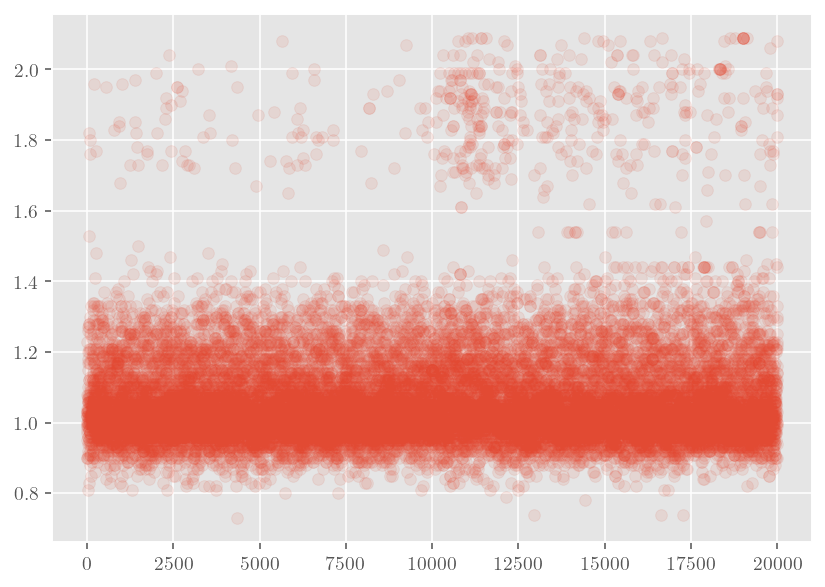

In [14]:
y = model.train_dataset.rewards.cpu().numpy() 
x = list(range(len(y)))
plt.scatter(x, y, alpha=0.1)



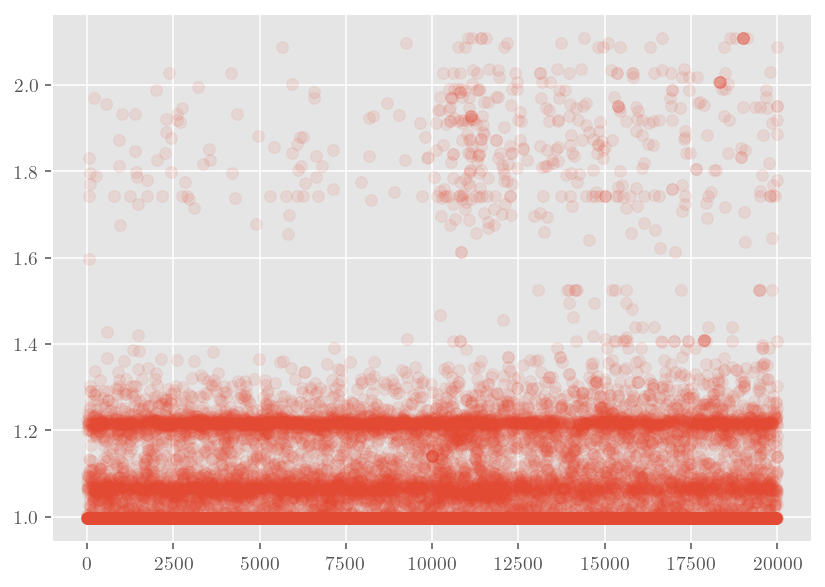

In [13]:
y = model.net(model.train_dataset.features).detach().cpu().numpy()
x = list(range(len(y)))
plt.scatter(x, y, alpha=0.1)

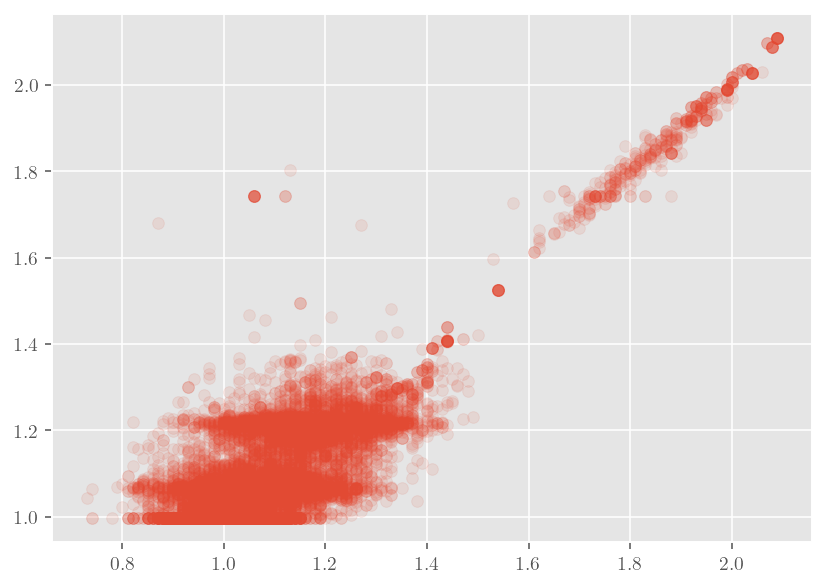

In [12]:
plt.scatter(model.train_dataset.rewards, y, alpha=0.1)

tensor(0.6800)


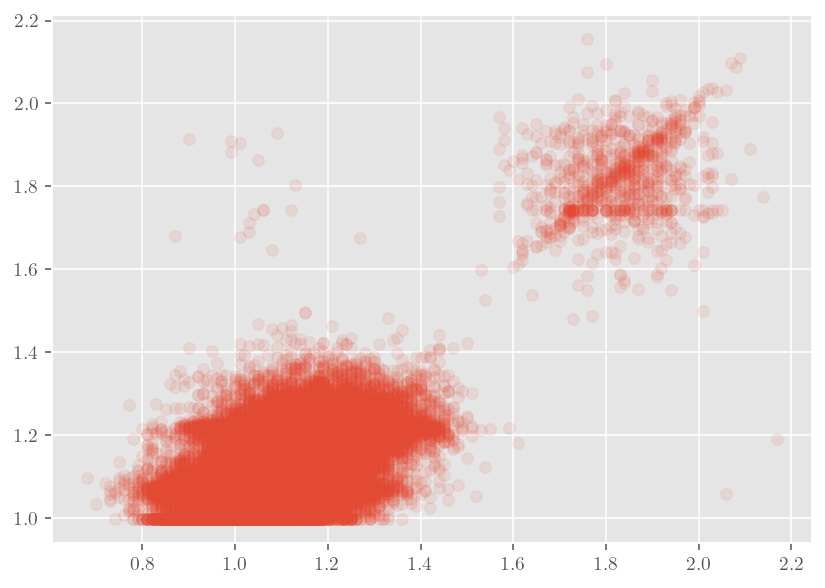

In [22]:
preds = model.net(combis.cpu()).detach().cpu().numpy()
plt.scatter(risks.cpu().numpy(), preds,alpha=0.1)
print(risks.min())